This tutorial will cover the basics of PCA (principal component analysis). This is a technique to project a dataset in high dimensions (that is, with a large number of free parameters: $f(x_1, x_2, ..., x_n)$) onto a lower-dimensional subspace (so that there are fewer free parameters to compare: $f'(x_1, x_2, ..., x_m)$ with $m<n$). In PCA, the parameters of the data considered are called **principal components**. These are computed by calculating the covariance matrix of the data and computing its spectrum.

Here, we'll use ```numpy``` to compute our covariance matrix and determine its spectrum.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

For this tutorial, we'll use randomly generated data. Below, we generate using a random Gaussian distribution on our first variable, and then for the following variables we give them linear dependencies on the other variables with random Gaussian noise.

In [69]:
data = np.ndarray([8,100])
data[0] = np.random.default_rng().normal(50, 10, size=(1, 100))
data[1] = np.random.default_rng().normal(10, 10, size=(1, 100)) + 0.2 * data[0]
data[2] = np.random.default_rng().normal(10, 10, size=(1, 100)) + 0.2 * data[1] - 0.2 * data[0]
data[3] = np.random.default_rng().normal(10, 10, size=(1, 100)) + 0.2 * data[0]
data[4] = np.random.default_rng().normal(10, 10, size=(1, 100)) + 0.2 * data[1] - 0.2 * data[0] + 0.2 * data[3]/4
data[5] = np.random.default_rng().normal(10, 10, size=(1, 100)) + 0.2 * data[1] + 0.2 * data[3]/2
data[6] = 6.582 * np.ones((1,100))
data[7] = np.random.default_rng().normal(10, 10, size=(1, 100)) - 0.2 * data[3] + 0.2 * data[5] - 0.2 * data[4]

To do our principal component analysis, we first need the covariance matrix. The matrix elements are defined $C_{ij} = \langle(y_i - \bar{y_j})(y_j - \bar{y_j})\rangle$. This is a symmetric positive semi-definite matrix by construction, so the eigenvalues are guaranteed real and non-negative. The matrix element $C_{ij}$ is the covariance between the $i^{th}$ and the $j^{th}$ variables. For example, suppose we were to interpret the sets of measurements in our ```data``` object as (say), time, voltage, pressure, temperature, energy, entropy, the value of Planck's constant, and velocity. The element $C_{16}$ would tell us the degree to which time varied with Planck's constant in our experiment (that is, whether they were correlated). Naturally, since the relationships should be symmetric, $C_{61} = C_{16}$, which creates the symmetric structure of the matrix.

Luckily, we don't need to write a function to compute this, or compute it by hand, since numpy has a built-in function to estimate it for us.

In [70]:
cov_mat = np.cov(data)
print(np.matrix(cov_mat))

[[ 1.03812963e+02  2.40287625e+01 -2.87856740e+01  2.81658436e+01
  -3.63421544e+00 -5.69787825e-01  2.35861442e-29 -1.25179354e+01]
 [ 2.40287625e+01  1.28790307e+02  3.30333448e+01 -3.65847860e+00
   9.66406615e+00  2.68075769e+01  1.97613641e-30  5.58426677e+00]
 [-2.87856740e+01  3.30333448e+01  8.39767225e+01 -1.41679639e+00
  -3.82076330e-02  1.04042602e+01  5.25907270e-31 -5.54354174e+00]
 [ 2.81658436e+01 -3.65847860e+00 -1.41679639e+00  1.06738302e+02
   2.08475497e+00 -9.31924120e+00  4.04789232e-30 -3.37480594e+01]
 [-3.63421544e+00  9.66406615e+00 -3.82076330e-02  2.08475497e+00
   1.02114211e+02 -1.50372205e+01 -1.97613641e-30 -3.77080604e+01]
 [-5.69787825e-01  2.68075769e+01  1.04042602e+01 -9.31924120e+00
  -1.50372205e+01  9.57912451e+01  2.23112175e-31  3.30222049e+01]
 [ 2.35861442e-29  1.97613641e-30  5.25907270e-31  4.04789232e-30
  -1.97613641e-30  2.23112175e-31  3.18731679e-30 -5.73717022e-31]
 [-1.25179354e+01  5.58426677e+00 -5.54354174e+00 -3.37480594e+01
  -

To better understand the covariance, we can look at a heat map. We should expect that the whole thing is symmetric, as mentioned previously.

Text(0.5, 0, 'Variable Number')

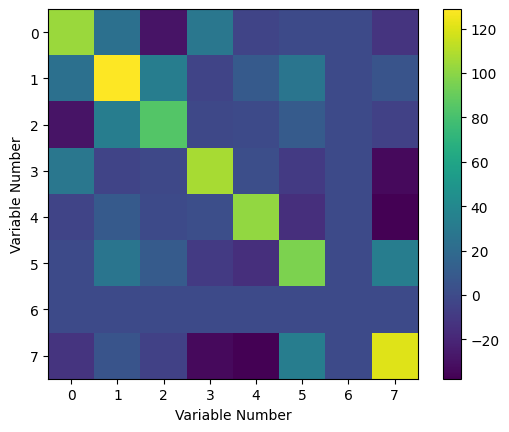

In [71]:
plt.imshow(cov_mat)
plt.colorbar()
plt.ylabel("Variable Number")
plt.xlabel("Variable Number")

So from this heat map, we can see how the variables covary with one another. In particular, we can see that the seventh variable (note that the index labeling starts at 0), the value of Planck's constant, has zero variance with every other variable. In some parts of the matrix, we can see negative values, which tell us that the variables vary as the inverse of one another. Finally, the diagonal elements are the variance of the measurements, and we can see that the variance is actually quite high for almost all of our measurements (excepting, of course, the value of the physical constant).

Now, to compute the principal components, we'll need to find the spectrum. The ```scikit-learn``` package actually has functions to do this for us, but since we didn't import it, we'll just have to use the native methods in ```numpy```! Fortunately, ```numpy``` has an eigenspace solver built into it, which will return the eigenvalues and the (right) eigenvectors of the matrix for us. Note that the list of eigenvectors is ordered to match the order of the eigenvalues so that the $i^{th}$ eigenvector is associated with the $i^{th}$ eigenvalue, and that the eigenvectors are automatically normalized.

In [74]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
print(eigenvalues)

[1.87398900e+02 1.57873633e+02 1.32915426e+02 3.75064632e+01
 9.49607646e+01 5.88589044e+01 7.24703471e+01 3.18731679e-30]


Note that the eigenvectors are returned as columns, so that the $i^{th}$ eigenvector is accessed using ```eigenvectors[:, i]```. We can plot our eigenvalues to see our principal values:

Text(0, 0.5, 'Eigenvalue Value')

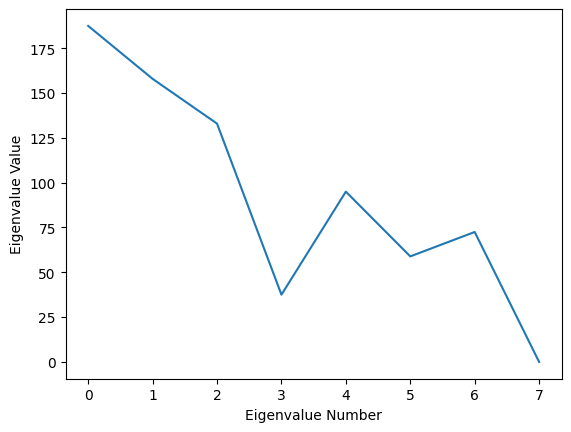

In [89]:
plt.plot(eigenvalues)
plt.xlabel("Eigenvalue Number")
plt.ylabel("Eigenvalue Value")

It is worth taking a step back to discuss the physical interpretation of these eigenvalues. Since the covariance matrix is symmetric and positive semi-definite, it is guaranteed to admit a "nice" diagonalization. This amounts to a change of basis on the matrix, which in its regular form is using a basis of variables we defined (e.g. time, pressure, volume, entropy, etc.). By diagonalizing, we lose the easy interpretation of what the $i^{th}$ basis vector physically means, but we know what linear combination of the original bases each basis vector is, and we are transform our covariance matrix into a form where each basis vector is orthogonal to the others. The eigenvalues associated with each eigenvector are the amount of variance associated with that eigenvector.

So, for example, in the above, we can see that the $0^{th}$ eigenvalue is the largest by far. We can take a look at its associated eigenvector:

In [76]:
print(eigenvectors[:, 0])

[-2.13699901e-01  2.12924974e-01  1.39854234e-01 -4.17300813e-01
 -3.39519185e-01  4.13761152e-01 -2.59554995e-30  6.54846978e-01]


What this is telling us is that this particular linear combination of the variables we started with accounts for a very large amount of the variance in the data sample. We can compute the exact amount that it accounts for as follows:

In [77]:
print(eigenvalues[0]/np.sum(eigenvalues))

0.2525644616567277


So, the principal component has contributions from all our original variables (time, pressure, etc.) except for the Planck's constant dataset, which is pretty much what we expect. Moreover, this single eigenvector accounts for a significant portion of the variance in our dataset (how much exactly, of course, will vary from run to run since we generated our data randomly). We can continue by looking at the rest of the eigenvalues to see how much of the variation in the data can be explained using them:

In [79]:
print((eigenvalues[0] + eigenvalues[1] + eigenvalues[2] + eigenvalues[4] + eigenvalues[6])/np.sum(eigenvalues))

0.8701248131200773


Here, we can see that only five eigenvectors are needed to capture almost all the information about the variance in our dataset. This means that if we restrict our analysis from eight variables to five, we still keep most of the correlations, while we filter out the variables that are effectively irrelevant or very weakly correlated. In this particular example, actually, we could continue adding eigenvalues to see that we only need seven total to capture *all* the variance:

In [81]:
print((np.sum(eigenvalues)-eigenvalues[7])/np.sum(eigenvalues))

1.0


This is in perfect agreement with what we should expect, since one of our variables was not a variable at all, but a physical constant! In other words, what PCA has told us is that we are looking at more things than we need to in order to understand our data - rather than being eight-dimensional, we can eliminate one dimension entirely and focus on the other seven. We can restrict further to study an approximation of our data, which allows us to focus on the linear combinations of our variables that result in the largest amount of variation in our data, at the cost of discarding some of the correlations. At the end of the day, what we then end up with is an $n$-dimensional space, where $n$ is the number of principal components (eigenvectors) we keep in our analysis.

There is an important caveat here. We are bringing to bear linear algebraic methods in order to map our data onto some $n$-dimensional Euclidean space. Thus, we are implicitly assuming that our data is being taken in a regime where we can approximate the correlations as linear, but generically, our data will have non-linear correlations. PCA will *not* capture properties of a non-Euclidean space, and will overestimate the dimensionality of the space needed to understand the data if your data space is curved. 

An analogy that may help to understand is to think of portion of a simple sine wave. PCA is like attempting to approximate the sine wave with a Taylor expansion. Depending on the size of the interval you're trying to approximate, you may be able to do it perfectly with only a few terms, or you may need dozens of terms. However, the underlying structure is not actually the sum of a finite number of functions, but merely a single one.

Anyway, once we know how to reduce the dimensionality of our data, the next step is to actually do the reduction. This means we need to project our data onto the lower-dimensional subspace. For simplicity, let's suppose we decide that the first two principal components (eigenvectors) are all we need for our analysis. The covariance matrix operates on the data space, but it acts on centered data (recall from the definition that we subtract the means). Thus, we will need our data itself to be centered, which we can do simply by subtracting the means.

In [86]:
means = np.mean(data, axis=1)
centered_data = data - np.transpose(np.tile(means, (100,1)))

Note that the centered data here is an 8x100 matrix, and our eigenvectors are 8x1 vectors:

In [93]:
print("Our centered data is a " + str(centered_data.shape) + " tensor.")
print("Our principal components (eigenvectors) are " + str(eigenvectors[:,0].shape) + " tensors." )

Our centered data is a (8, 100) tensor.
Our principal components (eigenvectors) are (8,) tensors.


We should also see how much of the variance we expect to capture with using only two principal components:

In [103]:
print((eigenvalues[0] + eigenvalues[1])/np.sum(eigenvalues))

0.46533662374678103


To project the data onto the new subspace, we're going to use the (Euclidean - remember the discussion above!) dot product. What we are doing is drawing a 2-dimensional plane in our 8-dimensional data space, and then compressing every data point onto the plane. We can no longer look at our individual variables (e.g. time, pressure, entropy, etc...), but now are studying what the data looks like on this plane defined by PC1 and PC2.

Text(0.5, 0, 'PC1')

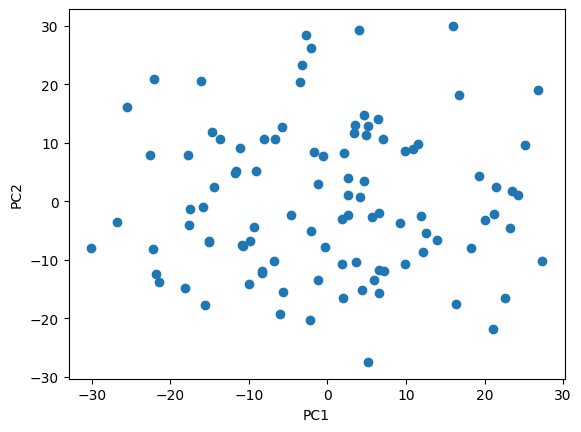

In [102]:
projections = np.dot(np.transpose(eigenvectors[:,0:2]),centered_data)
plt.scatter(projections[0,:],projections[1,:])
plt.ylabel('PC2')
plt.xlabel('PC1')